In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('input/train.tsv', sep = '\t', index_col=['train_id'])
test = pd.read_csv('input/test.tsv', sep = '\t', index_col=['test_id'])

C:\Users\Chenxiong\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482535 entries, 0 to 1482534
Data columns (total 7 columns):
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 90.5+ MB


In [4]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
categories = train['category_name'].str.split('/', n = 2, expand=True)
train['category1'], train['category2'], train['category3'] = categories[0], categories[1], categories[2]

In [6]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category1,category2,category3
train_id,,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


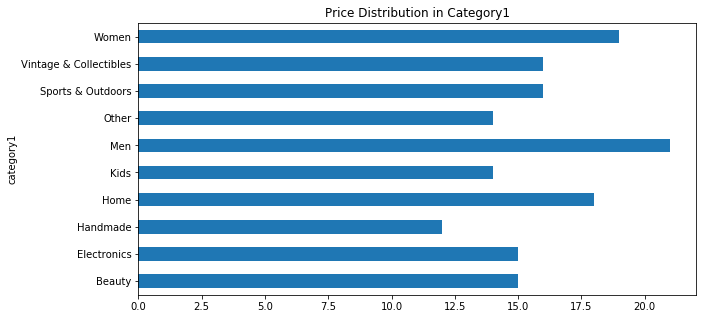

In [7]:
train.groupby('category1')['price'].median().plot(kind='barh', figsize = (10, 5), title = 'Price Distribution in Category1')

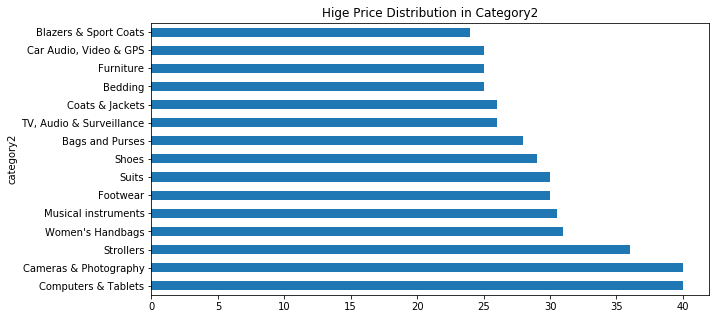

In [8]:
train.groupby('category2')['price'].median().sort_values(ascending=False)[:15].plot(kind='barh',  figsize = (10, 5), \
                                                                            title = 'Hige Price Distribution in Category2')

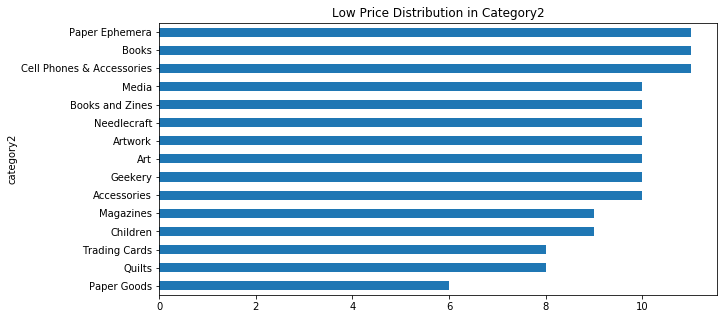

In [9]:
train.groupby('category2')['price'].median().sort_values()[:15].plot(kind='barh',  figsize = (10, 5), \
                                                                            title = 'Low Price Distribution in Category2')

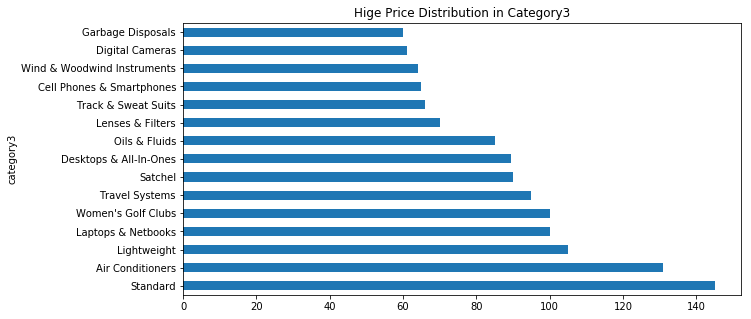

In [10]:
train.groupby('category3')['price'].median().sort_values(ascending=False)[:15].plot(kind='barh',  figsize = (10, 5), \
                                                                                    title = 'Hige Price Distribution in Category3')

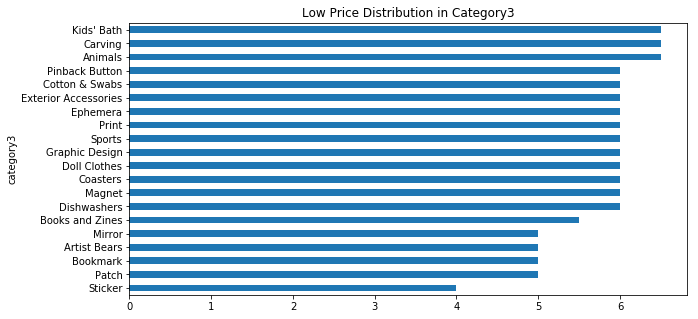

In [11]:
train.groupby('category3')['price'].median().sort_values()[:20].plot(kind='barh',  figsize = (10, 5), \
                                                                            title = 'Low Price Distribution in Category3')

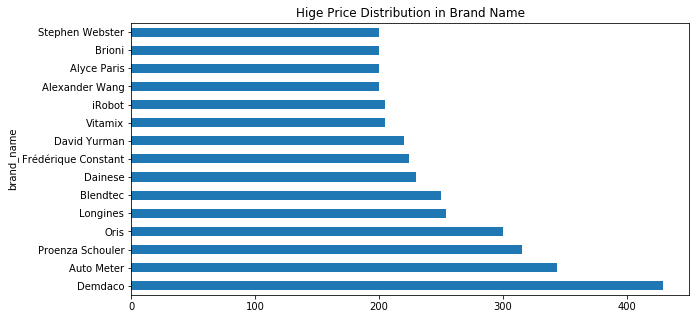

In [12]:
train.groupby('brand_name')['price'].median().sort_values(ascending=False)[:15].plot(kind='barh',  figsize = (10, 5), \
                                                                                    title = 'Hige Price Distribution in Brand Name')

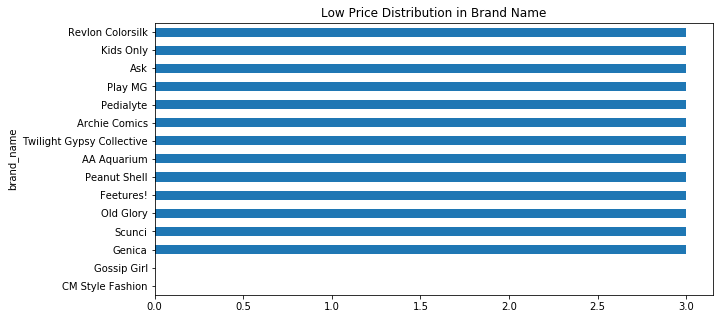

In [13]:
train.groupby('brand_name')['price'].median().sort_values()[:15].plot(kind='barh',  figsize = (10, 5), \
                                                                                    title = 'Low Price Distribution in Brand Name')

In [14]:
def high_low_price(groupby):
    groupby_median = train.groupby(groupby)['price'].median()
    high_price_99 = groupby_median.quantile(.99)
    low_price_01 = groupby_median.quantile(.01)
    high_price_cat = groupby_median[groupby_median > high_price_99].index.tolist()
    low_price_cat = groupby_median[groupby_median < low_price_01].index.tolist()
    return high_price_cat, low_price_cat
cat1_high, cat1_low = high_low_price('category1')
cat2_high, cat2_low = high_low_price('category2')
cat3_high, cat3_low = high_low_price('category3')
brand_high, brand_low = high_low_price('brand_name')

In [15]:
train['cat1_high'] = np.where(train['category1'].isin(cat1_high), 1, 0)
train['cat2_high'] = np.where(train['category2'].isin(cat2_high), 1, 0)
train['cat3_high'] = np.where(train['category3'].isin(cat3_high), 1, 0)
train['cat1_low'] = np.where(train['category1'].isin(cat1_low), 1, 0)
train['cat2_low'] = np.where(train['category2'].isin(cat2_low), 1, 0)
train['cat3_low'] = np.where(train['category3'].isin(cat3_low), 1, 0)
train['brand_high'] = np.where(train['brand_name'].isin(brand_high), 1, 0)
train['brand_low'] = np.where(train['brand_name'].isin(brand_low), 1, 0)

In [16]:
pop_brand = train['brand_name'].value_counts()[:50].index.tolist()
train['pop_brand'] = np.where(train['brand_name'].isin(pop_brand), 1, 0)

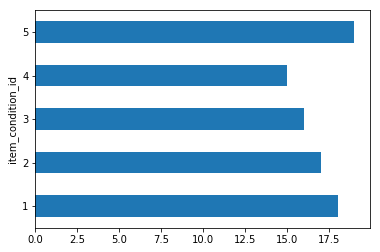

In [17]:
train.groupby('item_condition_id')['price'].median().plot(kind='barh')

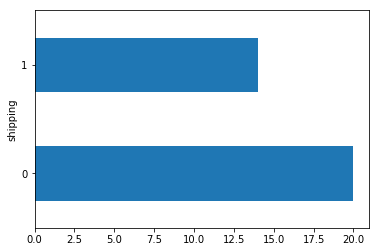

In [18]:
train.groupby('shipping')['price'].median().plot(kind='barh')

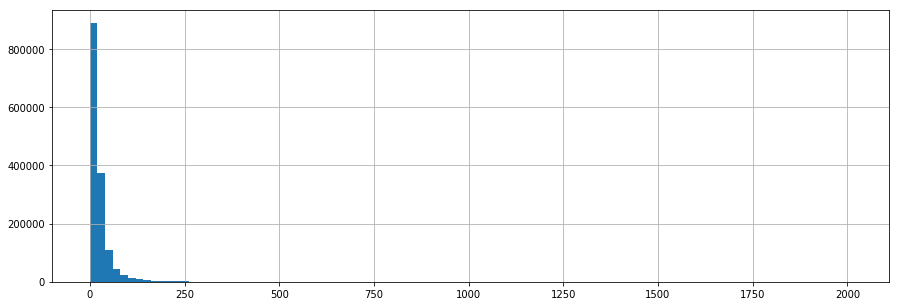

In [19]:
train['price'].hist(bins=100, figsize=(15,5))

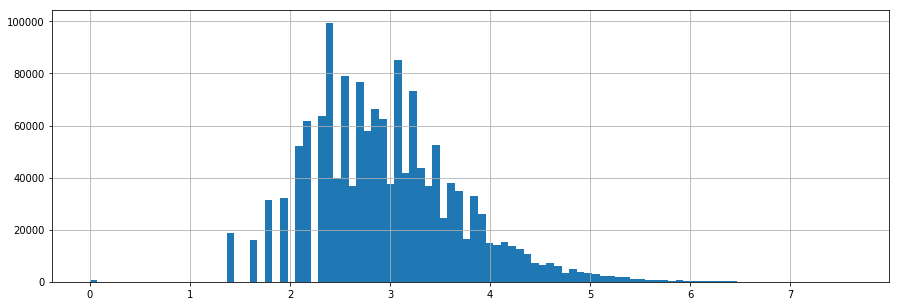

In [20]:
train['price'].apply(np.log1p).hist(bins=100, figsize=(15,5))

In [21]:
train_ = train.copy()
train_['price'] = train_['price'].apply(np.log1p)
train_.drop(['category_name'], axis=1, inplace=True)

In [22]:
train_.dropna(axis = 0, subset = ['item_description'], inplace=True)

In [23]:
train_['brand_name'].fillna('Unknown brand', inplace=True)

In [25]:
train_['category1'].fillna('Unknown category1', inplace=True)
train_['category2'].fillna('Unknown category2', inplace=True)
train_['category3'].fillna('Unknown category3', inplace=True)

In [27]:
from sklearn.model_selection import train_test_split
y = train_['price']
X = train_.drop(['price'], axis=1)
strat = (y/2).apply(np.ceil)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=strat)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

count_name = CountVectorizer(min_df = 10)
X_train_name = count_name.fit_transform(X_train['name'])
X_test_name = count_name.transform(X_test['name'])

In [29]:
count_category1, count_category2, count_category3 = CountVectorizer(), CountVectorizer(), CountVectorizer()
X_train_cat1 = count_category1.fit_transform(X_train['category1'])
X_test_cat1 = count_category1.transform(X_test['category1'])
X_train_cat2 = count_category2.fit_transform(X_train['category2'])
X_test_cat2 = count_category2.transform(X_test['category2'])
X_train_cat3 = count_category3.fit_transform(X_train['category3'])
X_test_cat3 = count_category3.transform(X_test['category3'])

In [30]:
import re

def preprocess(text):
    text = re.sub('(\d{2})\s?(gb?)', '\\1\\2', text, flags=re.IGNORECASE).upper()
    return text

In [31]:
count_des = TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english', \
                           preprocessor = preprocess, sublinear_tf=True)
X_train_dec = count_des.fit_transform(X_train['item_description'])

In [32]:
X_test_dec = count_des.transform(X_test['item_description'])

In [33]:
brand_label = LabelBinarizer(sparse_output=True)
X_train_brand = brand_label.fit_transform(X_train['brand_name'])
X_test_brand = brand_label.transform(X_test['brand_name'])

In [34]:
from scipy import sparse
other_col = ['cat1_high','cat2_high', 'cat3_high', 'cat1_low', 'cat2_low', 'cat3_low',
       'brand_high', 'brand_low', 'pop_brand']
X_train_other = sparse.csr_matrix(np.c_[pd.get_dummies(X_train[['item_condition_id', 'shipping']]), 
                                        X_train[other_col]])
X_test_other = sparse.csr_matrix(np.c_[pd.get_dummies(X_test[['item_condition_id', 'shipping']]), 
                                        X_test[other_col]])


In [35]:
X_train_ = sparse.hstack((X_train_name, X_train_cat1, X_train_cat2, \
                          X_train_cat3, X_train_dec, X_train_brand, X_train_other)).tocsr()
X_test_ = sparse.hstack((X_test_name, X_test_cat1, X_test_cat2, \
                          X_test_cat3, X_test_dec, X_test_brand, X_test_other)).tocsr()

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error

In [37]:
ridge = Ridge(solver='sag', random_state = 0)
ridge.fit(X_train_, y_train)
ridge_pred = ridge.predict(X_train_)

In [38]:
mean_squared_log_error(np.exp(y_train), np.exp(ridge_pred))

0.17628532075234363

In [39]:
ridge_test = ridge.predict(X_test_)
mean_squared_log_error(np.exp(y_test), np.exp(ridge_test))

0.19621659615835219

Text(0.5,1,'True vs Prediction in training')

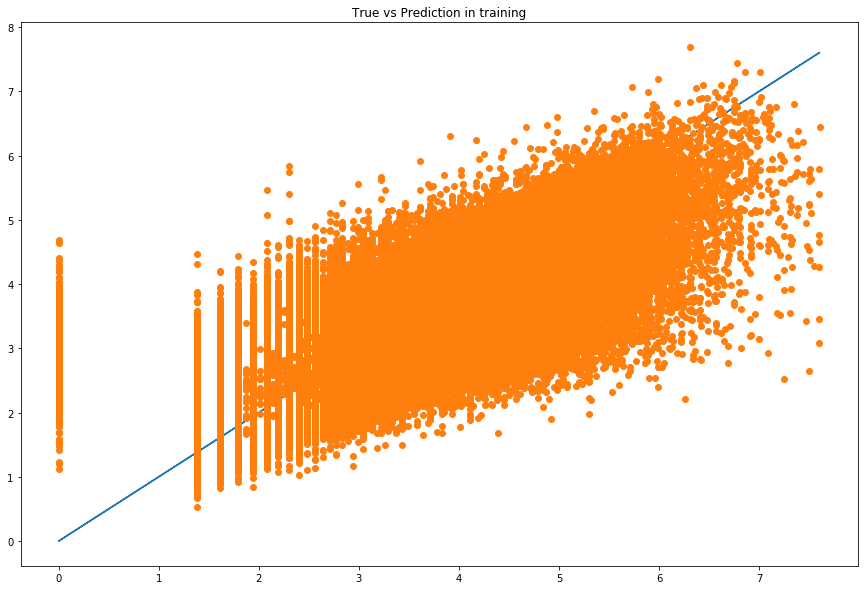

In [51]:
plt.figure(figsize=(15,10))
plt.plot(y_train, y_train, y_train, ridge_pred, 'o')
plt.title('True vs Prediction in training')

Text(0.5,1,'True vs Prediction in testing')

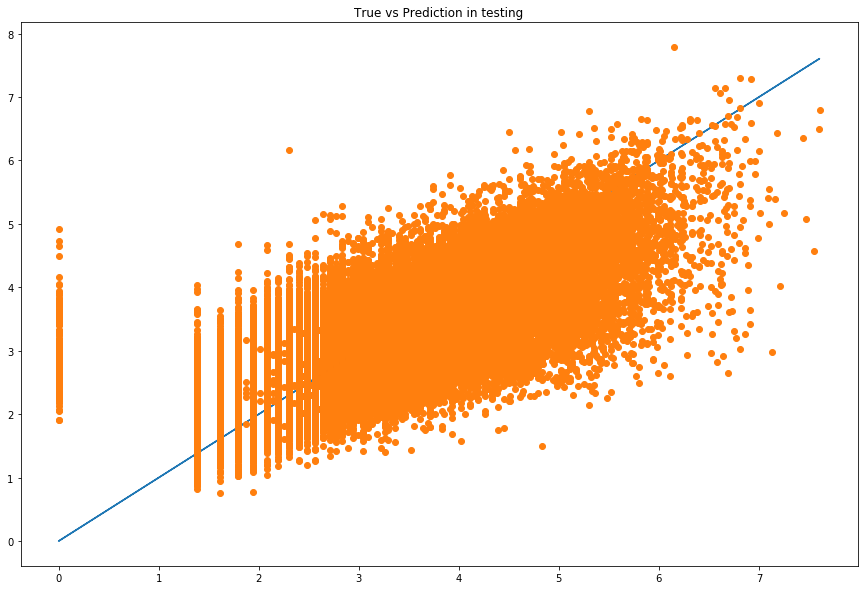

In [52]:
plt.figure(figsize=(15,10))
plt.plot(y_test, y_test, y_test, ridge_test, 'o')
plt.title('True vs Prediction in testing')

In [43]:
# features = count_name.get_feature_names() + count_category1.get_feature_names() + \
# count_category2.get_feature_names() + count_category3.get_feature_names() + count_des.get_feature_names()\
# + list(brand_label.classes_) + other_col


In [44]:
# feature_coef = zip(features, np.abs(ridge.coef_))
# sorted(feature_coef, key = lambda tup: tup[1], reverse=True)

In [91]:
train_error = np.abs(np.exp(y_train.values) - np.exp(ridge_pred))
train_error_f = pd.DataFrame(np.c_[train_error, X_train['category1'].values, X_train['category2'].values, \
                                  X_train['category3'].values, X_train['brand_name'].values], \
                             columns = ['errors','cat1', 'cat2', 'cat3', 'brand'])

In [92]:
train_error_f['errors'] = train_error_f['errors'].astype(float)
train_error_f.groupby('cat1')['errors'].mean().sort_values(ascending=False)

cat1
Electronics               15.502596
Vintage & Collectibles    12.884600
Men                       12.507761
Unknown category1         11.590336
Women                     10.139238
Sports & Outdoors          9.824214
Home                       9.335405
Other                      9.001353
Kids                       7.816972
Handmade                   7.532745
Beauty                     7.083604
Name: errors, dtype: float64

In [93]:
train_error_f.groupby('cat2')['errors'].mean().sort_values(ascending=False)[:15]

cat2
Computers & Tablets         42.793761
Cameras & Photography       35.061639
Strollers                   30.486846
Bags and Purses             29.617080
Women's Handbags            25.360370
Musical instruments         23.770244
Golf                        19.343833
Car Audio, Video & GPS      17.851083
TV, Audio & Surveillance    17.776163
Furniture                   17.114936
Footwear                    15.959847
Dolls and Miniatures        15.174291
Home Appliances             14.651584
Shoes                       13.990005
Diapering                   13.929089
Name: errors, dtype: float64

In [94]:
train_error_f.groupby('cat3')['errors'].mean().sort_values(ascending=False)[:15]

cat3
Standard                       113.583266
Laptops & Netbooks              87.747295
Music                           83.492374
Handbag                         72.724378
Brass Instruments               72.422158
Desktops & All-In-Ones          68.641173
Band & Orchestra                60.177154
Digital Cameras                 58.230773
Travel Systems                  55.832425
Cell Phones & Smartphones       52.791994
Air Conditioners                50.928350
Wind & Woodwind Instruments     49.520211
Flashes & Flash Accessories     46.965849
Tag                             45.935989
Laptop                          44.315352
Name: errors, dtype: float64

In [97]:
train_error_f.groupby('brand')['errors'].mean().sort_values(ascending=False)[:20]

brand
Demdaco                     377.809542
Proenza Schouler            295.710884
MCM Worldwide               179.291710
Celine                      171.820116
Vitamix                     162.619343
Auto Meter                  161.580000
Tria                        151.552005
Saint Laurent               146.090259
Mackage                     144.312737
Maggie Sottero              140.493128
Shinola                     140.026901
MICHELE                     133.292485
Stuart Weitzman             129.247285
David Yurman                122.902137
Bulova                      122.142269
Motorola Consumer Radios    114.883728
Contours                    114.418874
Ingersoll-Rand              113.661175
Chloé                       108.715523
Louis Vuitton               106.669101
Name: errors, dtype: float64